In [11]:
import numpy as np
import pandas as pd
import kaplanmeier as km

In [42]:
df = pd.read_csv("COVID19_data.csv", sep=",", keep_default_na=False, index_col='ID', 
  converters={
    'EXITUS': lambda x: 0 if x == 'NO' else 1,
    'SEX': lambda x: None if x == '' else x
  })
df

,AGE,SEX,DAYS_HOSPITAL,DAYS_ICU,EXITUS,DESTINATION,TEMP,HEART_RATE,GLUCOSE,SAT_O2,BLOOD_PRES_SYS,BLOOD_PRES_DIAS
ID,,,,,,,,,,,,
1,15,FEMALE,4,0,0,,37.0,0,0,92,0,0
2,18,FEMALE,4,0,0,ADMISSION,37.3,105,0,97,0,0
3,21,MALE,7,0,0,,38.5,112,0,95,85,47
4,21,MALE,10,0,0,ADMISSION,39.2,113,0,97,0,0
5,22,MALE,4,0,0,,36.3,80,0,92,111,70
...,...,...,...,...,...,...,...,...,...,...,...,...
2050,189,FEMALE,11,3,0,ADMISSION,0.0,0,0,0,0,0
2051,,FEMALE,3,0,0,,36.5,0,0,0,0,0
2052,,FEMALE,6,6,0,,36.8,190,0,98,0,0


In [50]:
null_sex = pd.isnull(df['SEX'])
df[null_sex]

,AGE,SEX,DAYS_HOSPITAL,DAYS_ICU,EXITUS,DESTINATION,TEMP,HEART_RATE,GLUCOSE,SAT_O2,BLOOD_PRES_SYS,BLOOD_PRES_DIAS
ID,,,,,,,,,,,,
189,44,None,22,8,0,ADMISSION,38.1,110,0,96,120,80
1146,72,None,11,0,0,,37.6,84,0,97,127,78


In [51]:
df = df.drop(df[null_sex].index)

KAPLAN_MEIER TEST

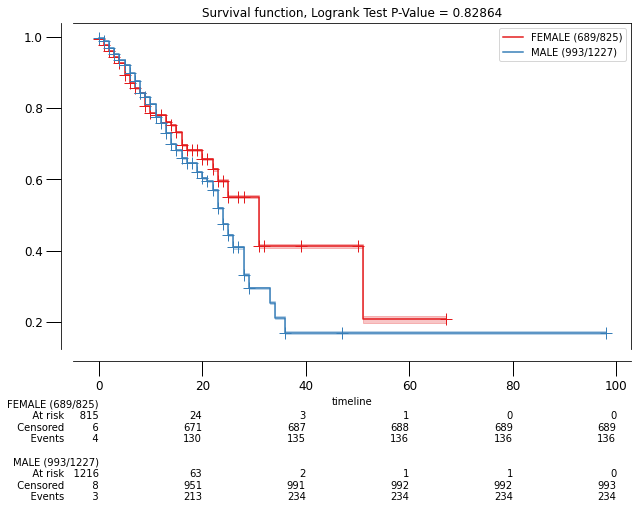

In [53]:
time_event = df['DAYS_HOSPITAL']
censoring = df['EXITUS']
labx = df['SEX']

out = km.fit(time_event, censoring, labx)
km.plot(out)

KERAS

In [1]:
from tensorflow import keras, nn
from tensorflow.keras import layers

2021-12-29 13:33:42.239673: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-29 13:33:42.239697: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [11]:
class CovidPredictor(keras.Model):
  def __init__(self) -> None:
    super().__init__()
    self.model = keras.Sequential([
      keras.Input(shape=(10,8,8,1)),
      layers.Dense(8, activation=nn.relu),
      layers.Dense(8, activation=nn.relu),
      layers.Dense(8, activation=nn.softmax)
    ])

  def train(self, x_train, y_train, batch_size=10, epochs=10):
    self.model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    self.model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [10]:
model = CovidPredictor()
model.model.build()
model.model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10, 8, 8, 8)       16        
                                                                 
 dense_16 (Dense)            (None, 10, 8, 8, 8)       72        
                                                                 
 dense_17 (Dense)            (None, 10, 8, 8, 8)       72        
                                                                 
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [12]:
batch_size = 10
epochs = 10

model.train(x_train, y_train, batch_size, epochs)

AttributeError: 'CovidPredictor' object has no attribute 'train'

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)